# 01. Import Libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler #used for scaling dataframe
import pylab as pl 

In [2]:
%matplotlib inline

# 02. Import Data

In [3]:
path = r'C:/Users/byl19/Acheivment 6/Acheivment 6'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Cleaned-Oil-Data.csv'))

In [5]:
df.head()

,Report Number,Accident Year,Accident Date,Accident Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Restart Date/Time,Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,Time Category
0,20150071,2015,26-Jan,2023-03-28 09:38:00,31618,ENTERPRISE PRODUCTS OPERATING LLC,ATEX-1,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,2/14/2015 13:30,1,1821591,194000,95000,0,0,4800000,6910591,Morning
1,20150040,2015,10-Jan,2023-03-28 20:45:00,31618,ENTERPRISE PRODUCTS OPERATING LLC,SHOUP TO MONT BELVIEU,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,1/28/2015 8:30,0,513460,215800,7500,45500,0,0,782260,Evening
2,20130126,2013,12-Mar,2023-03-28 17:46:00,31556,CHEVRON MIDSTREAM PIPELINES LLC,VENICE TO PARADIS NGL PIPELINE SYSTEM (VP-01),ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,6/9/2013 0:01,0,4588574,977937,0,4695638,0,0,10262149,Afternoon
3,20130307,2013,12-Aug,2023-03-28 23:10:00,31618,ENTERPRISE PRODUCTS OPERATING LLC,MAPL EAST LEG - MORRIS LATERAL,ONSHORE,UNDERGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,8/17/2013 20:33,32,200000,160000,50000,5000,50000,50000,515000,Evening
4,20130353,2013,29-Jul,2023-03-28 00:00:00,31570,TESORO HIGH PLAINS PIPELINE COMPANY LLC,TESORO HIGH PLAINS PIPELINE,ONSHORE,UNDERGROUND,CRUDE OIL,...,11/1/2013 10:40,0,269051,1417839,168000,4100000,11031800,0,16986690,Night


# 03. Unsupervised Machine Learning

In [6]:
df.columns

Index(['Report Number', 'Accident Year', 'Accident Date', 'Accident Time',
       'Operator ID', 'Operator Name', 'Pipeline/Facility Name',
       'Pipeline Location', 'Pipeline Type', 'Liquid Type', 'Accident City',
       'Accident County', 'Accident State', 'Cause Category',
       'Cause Subcategory', 'Unintentional Release (Barrels)',
       'Intentional Release (Barrels)', 'Liquid Recovery (Barrels)',
       'Net Loss (Barrels)', 'Liquid Ignition', 'Liquid Explosion',
       'Pipeline Shutdown', 'Shutdown Date/Time', 'Restart Date/Time',
       'Public Evacuations', 'Property Damage Costs', 'Lost Commodity Costs',
       'Public/Private Property Damage Costs', 'Emergency Response Costs',
       'Environmental Remediation Costs', 'Other Costs', 'All Costs',
       'Time Category'],
      dtype='object')

In [11]:
#altering dataframe for k-means algorithim (no categorical variables)
df2 = df[['Unintentional Release (Barrels)',
       'Intentional Release (Barrels)', 'Liquid Recovery (Barrels)',
       'Net Loss (Barrels)', 'Public Evacuations', 'Property Damage Costs', 'Lost Commodity Costs',
       'Public/Private Property Damage Costs', 'Emergency Response Costs',
       'Environmental Remediation Costs', 'Other Costs', 'All Costs']]

#### Scaling columns in df2

In [13]:
#defining standard scaler
scaler = StandardScaler()

In [14]:
#transform data
df2 = scaler.fit_transform(df2)

In [19]:
df2

array([[ 2.21844819e+01, -5.63021806e-02, -1.37434708e-01, ...,
        -3.00238817e-02,  7.72117152e+00,  3.66602465e-01],
       [ 1.96691777e+01,  7.20188098e-01, -1.37434708e-01, ...,
        -3.00238817e-02, -5.53418297e-02, -3.12351177e-03],
       [ 1.71692196e+01,  5.22655083e-01, -1.37434708e-01, ...,
        -3.00238817e-02, -5.53418297e-02,  5.68804019e-01],
       ...,
       [-1.50717907e-01, -5.63021806e-02, -1.35603510e-01, ...,
        -2.97749075e-02, -5.53418297e-02, -4.94097627e-02],
       [-1.51302521e-01, -5.63021806e-02, -1.37068468e-01, ...,
        -3.00238817e-02, -5.53418297e-02, -4.78183618e-02],
       [-1.48525602e-01, -5.63021806e-02, -1.30109915e-01, ...,
        -3.00238817e-02, -5.53418297e-02, -4.75545963e-02]])

In [26]:
#converting array to dataframe
df3 = pd.DataFrame(df2, columns=['Unintentional Release (Barrels)',
       'Intentional Release (Barrels)', 'Liquid Recovery (Barrels)',
       'Net Loss (Barrels)', 'Public Evacuations', 'Property Damage Costs', 'Lost Commodity Costs',
       'Public/Private Property Damage Costs', 'Emergency Response Costs',
       'Environmental Remediation Costs', 'Other Costs', 'All Costs'])

In [27]:
df3.head()

,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,22.184482,-0.056302,-0.137435,25.685871,0.011659,1.965560,2.887977,0.133698,-0.063163,-0.030024,7.721172,0.366602
1,19.669178,0.720188,-0.137435,22.780757,-0.048576,0.461555,3.229752,-0.033501,-0.053296,-0.030024,-0.055342,-0.003124
2,17.169220,0.522655,-0.137435,19.893368,-0.048576,5.146858,15.178338,-0.047833,0.955124,-0.030024,-0.055342,0.568804
3,13.294687,-0.056302,-0.137435,15.418378,1.878954,0.101159,2.354934,0.047710,-0.062079,-0.025874,0.025664,-0.019247
4,14.902377,-0.056302,10.586062,12.332644,-0.048576,0.180550,22.075008,0.273190,0.825955,0.885521,-0.055342,0.974500


#### Elbow Technique

In [38]:
num_cl = range(1, 15)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [39]:
score = [kmeans[i].fit(df3).score(df3) for i in range(len(kmeans))]

score

[-33540.0,
 -23437.839831305108,
 -17939.3102137866,
 -15094.538283294214,
 -12175.978541752967,
 -9931.324416031568,
 -7972.541656326511,
 -6496.77937839492,
 -5851.894013238362,
 -5226.813049244258,
 -4642.333076075179,
 -4101.307379924347,
 -3703.2890036201666,
 -3348.3554049880236]

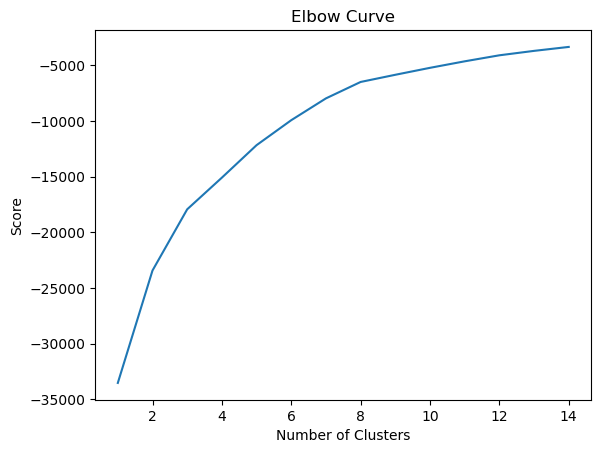

In [40]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### In this elbow curve the curve begins to flatten out at 8 clusters meaning the optimal amount of clusters for our data is 8

#### Running the k-means algorithm 

In [41]:
#kmeans object
kmeans = KMeans(n_clusters = 8) 

In [42]:
#fitting object to df3
kmeans.fit(df3)

KMeans()

In [50]:
#add count of clusters column to df3
df3['Clusters'] = kmeans.fit_predict(df3)

In [51]:
df3.head()

,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs,Clusters
0,22.184482,-0.056302,-0.137435,25.685871,0.011659,1.965560,2.887977,0.133698,-0.063163,-0.030024,7.721172,0.366602,3
1,19.669178,0.720188,-0.137435,22.780757,-0.048576,0.461555,3.229752,-0.033501,-0.053296,-0.030024,-0.055342,-0.003124,3
2,17.169220,0.522655,-0.137435,19.893368,-0.048576,5.146858,15.178338,-0.047833,0.955124,-0.030024,-0.055342,0.568804,3
3,13.294687,-0.056302,-0.137435,15.418378,1.878954,0.101159,2.354934,0.047710,-0.062079,-0.025874,0.025664,-0.019247,3
4,14.902377,-0.056302,10.586062,12.332644,-0.048576,0.180550,22.075008,0.273190,0.825955,0.885521,-0.055342,0.974500,3


In [52]:
df['Clusters'].value_counts()

0    2722
5      49
3       9
7       6
4       4
6       2
1       2
2       1
Name: Clusters, dtype: int64

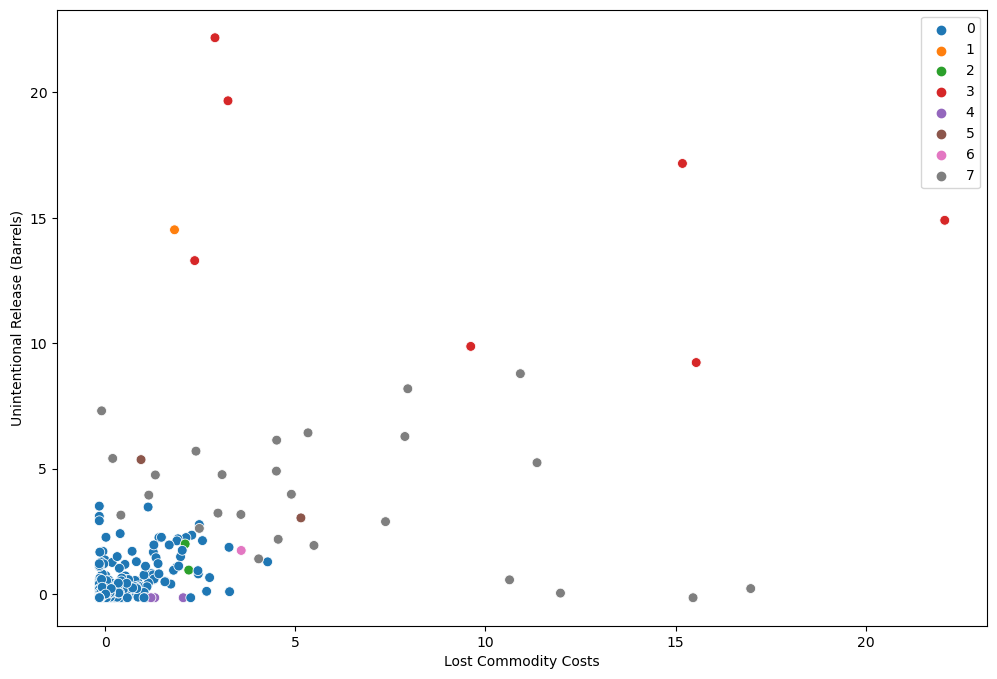

In [71]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df3['Lost Commodity Costs'], y=df3['Unintentional Release (Barrels)'], hue=kmeans.labels_, s=50, legend = "full", palette="tab10") 
ax.grid(False) 
plt.xlabel('Lost Commodity Costs')
plt.ylabel('Unintentional Release (Barrels)')
plt.show()

#### These clusters to me are making seence. For example, cluster 0 which is the most populated cluster by a lot represents oil spills that had a lower unintentional release of barrela and a lower commodity cost. Most oil spills fall within this category and there are a couple which stray from it either with high barrel loss or high commodiy cost. Cluster 3 we can also see to be the laege values cluster either having a huge unintentional release of barrels or a high cost. Cluster 5 (mislabeled in legend as 7) is our cluster in the middle with medium commodity costs as well as medium level barrel release. 

In [67]:
df3.loc[df3['Clusters'] == 0, 'cluster'] = 'blue'
df3.loc[df3['Clusters'] == 1, 'cluster'] = 'orange'
df3.loc[df3['Clusters'] == 2, 'cluster'] = 'green'
df3.loc[df3['Clusters'] == 3, 'cluster'] = 'red'
df3.loc[df3['Clusters'] == 4, 'cluster'] = 'purple'
df3.loc[df3['Clusters'] == 5, 'cluster'] = 'gray'
df3.loc[df3['Clusters'] == 6, 'cluster'] = 'pink'
df3.loc[df3['Clusters'] == 7, 'cluster'] = 'brown'


In [68]:
df3.columns

Index(['Unintentional Release (Barrels)', 'Intentional Release (Barrels)',
       'Liquid Recovery (Barrels)', 'Net Loss (Barrels)', 'Public Evacuations',
       'Property Damage Costs', 'Lost Commodity Costs',
       'Public/Private Property Damage Costs', 'Emergency Response Costs',
       'Environmental Remediation Costs', 'Other Costs', 'All Costs',
       'Clusters', 'cluster'],
      dtype='object')

In [69]:
#descriptive statistics
df3.groupby('cluster').agg({'Unintentional Release (Barrels)':['mean', 'median'], 
                         'Intentional Release (Barrels)':['mean', 'median'], 
                         'Liquid Recovery (Barrels)':['mean', 'median'],
                          'Net Loss (Barrels)':['mean', 'median'],
                           'Public Evacuations':['mean', 'median'], 
                         'Property Damage Costs':['mean', 'median'], 
                         'Lost Commodity Costs':['mean', 'median'],
                          'Public/Private Property Damage Costs':['mean', 'median'],
                           'Emergency Response Costs':['mean', 'median'], 
                         'Environmental Remediation Costs':['mean', 'median'], 
                         'Other Costs':['mean', 'median'],
                          'All Costs':['mean', 'median']})

Unintentional Release (Barrels)             \
                                   mean     median   
cluster                                              
blue                          -0.085948  -0.149987   
brown                          3.960148   3.958392   
gray                           4.194795   4.194795   
green                          1.471953   1.471953   
orange                        14.523839  14.523839   
pink                           0.416541   0.039647   
purple                        -0.150769  -0.151237   
red                           15.188838  14.902377   

        Intentional Release (Barrels)            Liquid Recovery (Barrels)  \
                                 mean     median                      mean   
cluster                                                                      
blue                        -0.036761  -0.056302                 -0.058076   
brown                        0.772111  -0.056302                  3.803691   
gray                         0.891256   0.891256                  6.764351   
green                       -0.056302  -0.056302                  0.869724   
orange                      -0.056302  -0.056302                 33.272777   
pink                        -0.056302  -0.056302                  0.731011   
purple                      26.148653  23.505785                 -0.137435   
red                          0.168904  -0.056302                  1.394493   

                   Net Loss (Barrels)            Public Evacuations  \
            median               mean     median               mean   
cluster                                                               
blue     -0.136080          -0.072500  -0.111574          -0.031294   
brown     1.803635           2.820711   2.364778           0.310519   
gray      6.764351           1.727121   1.727121          35.189092   
green     0.869724           1.299204   1.299204           1.186248   
orange   33.272777           1.438889   1.438889           3.625779   
pink      0.261767           0.144163  -0.072327          -0.048576   
purple   -0.137435          -0.110789  -0.111330          -0.048576   
red      -0.137435          16.899993  15.418378           0.278416   

                    ... Public/Private Property Damage Costs             \
            median  ...                                 mean     median   
cluster             ...                                                   
blue     -0.048576  ...                            -0.031496  -0.047833   
brown    -0.048576  ...                             0.164345  -0.047833   
gray     35.189092  ...                            12.118344  12.118344   
green     1.186248  ...                             7.117854   7.117854   
orange    3.625779  ...                            43.901712  43.901712   
pink     -0.048576  ...                            -0.047833  -0.047833   
purple   -0.048576  ...                            -0.044648  -0.045922   
red      -0.048576  ...                             0.041704  -0.033501   

        Emergency Response Costs            Environmental Remediation Costs  \
                            mean     median                            mean   
cluster                                                                       
blue                   -0.043354  -0.062621                       -0.022183   
brown                   1.310407  -0.044531                        0.180163   
gray                    1.470699   1.470699                        0.666646   
green                  20.614367  20.614367                        0.900390   
orange                 38.320716  38.320716                       52.669517   
pink                    0.337753   0.291400                       -0.025874   
purple                 -0.062789  -0.062617                       -0.030010   
red                     0.214079  -0.053296                        0.101361   

                   Other Costs             All Costs             
          

#### There are a lot of findings here. One that really sticks out to me is our orange cluster and how far away from the mean it strays for all costs. In our lost commodity costs our orange cluster wasnt very high but looking at the other costs involved in a oil spill we can see it strays from the mean greatly. In the public/private prop damage costs, emergency response costs, and total costs it an average z-score of at least 38. The difference also in this orange cluster is that there is a large value for the liquid recovery of barrels  which could be an indicator of the costs being higher and the lost commodity cost not being as high. Now with all these values there is a data bias of not enough data points for many of these clusters. Some clusters only include 2 data points which isnt enough for a good sample. It makes sense why this number is so low because so many of our data points of oil spills are within the smaller ranges of costs and barrels lost. In all honesty the quantitative data in this set isnt the most usable because of this and the questions I am looking for more use categorical variables and counts of qualitative data points. Even so, this data can still be beneficial for our analysis. 